In [13]:
import os
import librosa
import numpy as np
from hmmlearn.hmm import GMMHMM
import pickle
from sklearn.externals import joblib
from python_speech_features import mfcc
import librosa.display
import matplotlib.pyplot as plt

import cv2
import pyaudio






In [112]:
# DATA AUGMENTATION AND COLLECTION 

training_speaker_name='rajat'

file_path='C:/Anaconda codes/speaker reco/something new/for hack/dataset/'+training_speaker_name+'/'
file_names = os.listdir(file_path)
print((len(file_names)))

#speakers=["rahul","rajat","priti"]
speakers =["nishant","padma","rajat","shreekar","shruthi"]
#speakers =["nishant","rajat"]

for i in range(0,len(file_names)):
    speech, rate = librosa.core.load(file_path+file_names[i])
    print(rate)

5
22050
22050
22050
22050
22050


In [113]:
max_len=13

lengths = np.empty(len(file_names))
print(np.shape(lengths))

feature_vectors = np.empty([20,0])

for i in range(len(file_names)):
    x, rate = librosa.load(file_path+file_names[i])               #loads the file
    #rate, x = wavfile.read(file_names[i])
    x=librosa.feature.mfcc(y=x[0:int(len(x)/1.25)], sr=rate)      #extracts mfcc
    
    
    mfcc=x
    """
    if (max_len>mfcc.shape[1]):
        pad_width=max_len-mfcc.shape[1]
        mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),
                    mode='constant')
        
    else:
        mfcc=mfcc[:,:max_len]
    
    x=mfcc
    """
        
    #x = mfcc(x[0:len(x)/1.25], samplerate=rate)
    lengths[i] = int(len(x.transpose()))    
   
    print(np.shape(x))
    
    feature_vectors = np.concatenate((feature_vectors, x),axis=1)
    #feature_vectors = np.vstack((feature_vectors, x.transpose()))
    
print(((lengths)))
print(np.shape(feature_vectors))


"""
lengths = np.empty(len(file_names))
feature_vectors = np.empty([13, 0])

for i in range(len(file_names)):
    x, rate = librosa.load(file_path+file_names[i]) 
    #rate, x = wavfile.read(file_names[i])
    x = mfcc(x[0:int(len(x)/1.25)], samplerate=rate)
    lengths[i] = int(len(x.transpose()))
    print(np.shape(x))
    feature_vectors = np.concatenate((feature_vectors, x),axis=1)

    
print(((lengths)))
print(np.shape(feature_vectors))
"""

(5,)
(20, 173)
(20, 173)
(20, 173)
(20, 173)
(20, 173)
[ 173.  173.  173.  173.  173.]
(20, 865)


'\nlengths = np.empty(len(file_names))\nfeature_vectors = np.empty([13, 0])\n\nfor i in range(len(file_names)):\n    x, rate = librosa.load(file_path+file_names[i]) \n    #rate, x = wavfile.read(file_names[i])\n    x = mfcc(x[0:int(len(x)/1.25)], samplerate=rate)\n    lengths[i] = int(len(x.transpose()))\n    print(np.shape(x))\n    feature_vectors = np.concatenate((feature_vectors, x),axis=1)\n\n    \nprint(((lengths)))\nprint(np.shape(feature_vectors))\n'

In [114]:
#TRAINING A MODEL


N = 3  # Number of States of HMM
Mixtures = 64# Number of Gaussian Mixtures.


model = GMMHMM(n_components=N, n_mix=Mixtures, covariance_type='diag')

startprob = np.ones(N) * (10**(-30))  # Left to Right Model
startprob[0] = 1.0 - (N-1)*(10**(-30))
transmat = np.zeros([N, N])  # Initial Transmat for Left to Right Model
print(startprob,'\n',transmat)
for i in range(N):
    for j in range(N):
        transmat[i, j] = 1/(N-i)
transmat = np.triu(transmat, k=0)
transmat[transmat == 0] = (10**(-30))


model = GMMHMM(n_components=N, n_mix=Mixtures, covariance_type='diag', init_params="mcw",n_iter=100)

model.startprob_ = startprob
model.transmat_ = transmat
print(startprob,'\n',transmat)

feature=feature_vectors.transpose()
print(np.shape(feature))

lengths = [ int(x) for x in lengths ]
print(type(lengths[0]))

model.fit(feature,lengths)

joblib.dump(model, "C:/Anaconda codes/speaker reco/something new/for hack/models/"+training_speaker_name+".pkl")

[  1.00000000e+00   1.00000000e-30   1.00000000e-30] 
 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[  1.00000000e+00   1.00000000e-30   1.00000000e-30] 
 [[  3.33333333e-01   3.33333333e-01   3.33333333e-01]
 [  1.00000000e-30   5.00000000e-01   5.00000000e-01]
 [  1.00000000e-30   1.00000000e-30   1.00000000e+00]]
(865, 20)
<class 'int'>


['C:/Anaconda codes/speaker reco/something new/for hack/models/rajat.pkl']

In [ ]:
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [23]:
print(speakers)

None


In [ ]:
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [155]:
#record voice in real time

import pyaudio
import wave
import os
import librosa
import numpy as np
from hmmlearn.hmm import GMMHMM
import pickle
from sklearn.externals import joblib
 

#RECORD SPEAKERS VOICE FOR GIVING ATTENDANCE

FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 3
WAVE_OUTPUT_FILENAME = "samples/file.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
print("recording...")
frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("finished recording")
 
 # stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()




recording...
finished recording


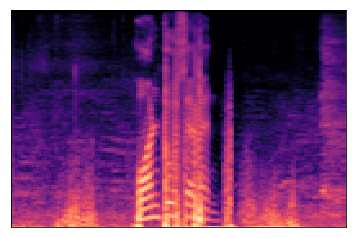

[11291.712144032572, 13455.022659803024, 10900.32756805944, 12400.185862022981, 13188.005878639895]
Hi rajat.How are you?


In [156]:
speakers =["nishant","padma","rajat","shreekar","shruthi"]
#speakers =["nishant","padma","rajat"]

threshold = 300
l=2
uppercutoff=20000
lowercutoff=8000

#open the test data and find its probability 
#compare it with test probability and print predictions

student="samples/file.wav" #SPEAKERS VOICE STORED



file_path1="C:/Anaconda codes/speaker reco/something new/"
#file_path1="C:/Anaconda codes/speaker reco/something new/for hack/other students/"
test_speech1 = student
speech1, rate = librosa.core.load(file_path1+test_speech1)     #EXTRACT MFCC AND ADD IT OT FEATURE VECTOR
feature_vectors12 = librosa.feature.mfcc(y=speech1, sr=rate)

features1=feature_vectors12.transpose()
#print(np.shape(features1))

S = librosa.feature.melspectrogram(y=speech1, sr=rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
plt.show()

#GET THE PREDICTION VALUES FOR EVERY MODEL CREATED FOR EACH SPEAKER
x=[]

path ="C:/Anaconda codes/speaker reco/something new/for hack/models/"
names = os.listdir(path)
#print(names)

h=[]
for i in range(0,len(names)):
    m1=joblib.load("C:/Anaconda codes/speaker reco/something new/for hack/models/"+str(names[i]) )
    p1 = m1.score(features1)
    #print(m1.predict(features1))
    p1=abs(p1)
    x.append(p1)
    #print(m1.predict(features1),'\n')

x[l]=x[l]+threshold

y=x.index(min(x))
print(x)
#print(x.index(min(x))+1)
if min(x)<uppercutoff and min(x)>lowercutoff:
    
    print("Hi "+speakers[y]+".How are you?")
    p=speakers[y]
    
else:
    print("cant recognise. Speak again")



In [94]:
import speech_recognition as sr
import re
from os import path

#CONVERT WHAT THE SPEAKER SAID TO TEXT, USING SPEECH RECONITION
#HERE GOOGLE API IS USED
#WE CAN TRAIN USING OUR OWN MODEL, BUT THE ACCURACY IS NOT GREAT, DUE TO LESS DATASETS AVAILABLE

AUDIO_FILE = ( student)

# use the audio file as the audio source
r = sr.Recognizer()
with sr.AudioFile(AUDIO_FILE) as source:
    #print("Say something!")
    audio = r.record(source)  # read the entire audio file
try:
    #print("Google Speech Recognition thinks you said : " + r.recognize_google(audio))
    number=r.recognize_google(audio)
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))
    
#number=int(number)
#print(number)



#THIS FUNCTION IS USED TO EXTRACT ONLY THE NUMBERS OUT OF THE SPOKEN SENTENCE BY THE SPEAKER
#EXAMPLE : SPEAKER SPEAKS "NAME AND 302", THE FUNCTIONS EXTRACTS 302 FOR ROLL NUMBER ANALYSIS
#--------------------------------------------------------------------------------------------------------------------------------
def extractMax(input): 
  
     # get a list of all numbers separated
     numbers = re.findall('\d+',input) 
  
     # now we need to convert each number into integer 
     # int(string) converts string into integer 
     numbers = map(int,numbers) 
  
     return(max(numbers) )

#--------------------------------------------------------------------------------------------------------------------------------
    
number=str(extractMax(number))
print("speaker said",number)

speaker said 127


recording...
SAY pulse
finished recording
speaker spoke pulse
[13203.536137431507, 16990.206455596115, 12916.588825864796, 15553.413772096339, 16103.941513497157]
rajat is confirmed and spoke 127

 before updation
      NAMES  ROLL_NUMBER  ATTENDANCE
0   nishant          102           0
1     rohit          132           0
2     rajat          127           1
3  shreekar          149           0
4     padma          106           0
5   shurthi          153           0
6     sarah          167           0 



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 after updation
      NAMES  ROLL_NUMBER  ATTENDANCE
0   nishant          102           0
1     rohit          132           0
2     rajat          127           1
3  shreekar          149           0
4     padma          106           0
5   shurthi          153           0
6     sarah          167           0
['102.JPG', '106.jpg', '127.jpg']


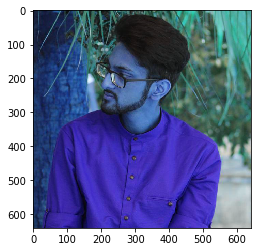

In [ ]:
#FOR FURTHER AUTHENTICATION, WE ASK THE SPEAKER TO SPEAK A RANDOM GENERATED WORD, TO AVOID PROXY


#record voice in real time

import pyaudio
import wave
import os
import librosa
import numpy as np
from hmmlearn.hmm import GMMHMM
import pickle
from sklearn.externals import joblib
import random
 
    
#RANDOM WORDS
flag=0
random1=["apple","mango","pizza","chips","abort","above","leave","actor","adore","brass","colour","hazel","pulse","sleep"]

threshold=100
    
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "random.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)

xx=random.choice(random1)
print("recording...")
print("SAY", xx)

frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("finished recording")
 
 # stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()


import speech_recognition as sr
import re

# obtain path to "Daily_English_Conversation_02_Do_you_speak_English.wav" in the same folder as this script
from os import path

AUDIO_FILE = ("random.wav")
#AUDIO_FILE = ( "file.wav")

# use the audio file as the audio source
r = sr.Recognizer()
with sr.AudioFile(AUDIO_FILE) as source:
    #print("Say something!")
    audio = r.record(source)  # read the entire audio file
try:
   
    word=r.recognize_google(audio)
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))
    
word=word.lower()
print("speaker spoke",word)


#THIS FUNCTION IS USED TO UPDATE THE VALUES IN THE CSV FILE AND GIVE ATTENDANCE TO THE STUDENTS
#------------------------------------------------------------------------------------------------------------------------------
def update(n,r):
    r=int(r)
    data = pd.read_csv("C:/Anaconda codes/speaker reco/something new/for hack/attendance_database.csv") 

    names=data["NAMES"]
    names=list(names)

    usn=data["ROLL_NUMBER"]
    usn=list(usn)

    att=data["ATTENDANCE"]
    att=list(att)
    att1=list(att)

    rows=len(names)
    
    for i in range(0,len(names)):
        if names[i]==n:
            break

    for j in range(0,len(usn)):
        if int(usn[j])==r:
            break

    if i==j:
        att[i]=1


    df = pd.read_csv("C:/Anaconda codes/speaker reco/something new/for hack/attendance_database.csv") 

    #df = pd.DataFrame(data, columns = ['NAMES','ROLL_NUMBER','ATTENDANCE'])
    
    df = df[['NAMES','ROLL_NUMBER','ATTENDANCE']]
    print("\n before updation")
    print(df,"\n")

    for i in range(0,len(names)):
        (df['ATTENDANCE'][i])=att[i]
    

    print("\n after updation")
    print(df)

    df.to_csv("C:/Anaconda codes/speaker reco/something new/for hack/attendance_database.csv")
    
#------------------------------------------------------------------------------------------------------------------------------


#PREDICT WHO SPOKE THE RANDON GIVEN WORD FOR MORE AUTHENTICATION
#speakers =["nishant","padma","rajat"]
#open the test data and find its probability 
#compare it with test probability and print predictions

student="random.wav"

file_path1="C:/Anaconda codes/speaker reco/something new/"
test_speech1 = student
speech1, rate = librosa.core.load(file_path1+test_speech1)
feature_vectors12 = librosa.feature.mfcc(y=speech1, sr=rate)

features1=feature_vectors12.transpose()
#print(np.shape(features1))


x=[]
path ="C:/Anaconda codes/speaker reco/something new/for hack/models/"
names = os.listdir(path)
#print(names)

h=[]
for i in range(0,len(names)):
    m1=joblib.load("C:/Anaconda codes/speaker reco/something new/for hack/models/"+str(names[i]) )
    p1 = m1.score(features1)
    p1=abs(p1)
    x.append(p1)
    #print(m1.predict(features1),'\n')

x[l]=x[l]+threshold

y=x.index(min(x))
print(x)
#print(x.index(min(x))+1)

if min(x)<uppercutoff and min(x)>lowercutoff:
    p1=speakers[y]
    
    if word==xx and p==p1:                         #checking if the said word is present in the random words list

        flag=1
        print(speakers[y]+" is confirmed and spoke "+ number)
        
        if (p=="rajat" and number=="127" and flag==1):
            update(p,number)
            print_img(number+".jpg")
            print("attendance given to rajat")
        elif (p=="nishant" and number=="102" and flag==1):
            update(p,number)
            print_img(number+".jpg")
            print("attendance given to nishanth")
        elif (p=="padma" and number=="106" and flag==1):
            update(p,number)
            print_img(number+".jpg")
            print("attendance given to padma")
        else:
            print("dont try to give proxy")
        
    else:
        print("AUTHENTICATION FAILED")
        print("dont try to give proxy")
    
else:
    print("AUTHENTICATION FAILED")
    print("dont try to give proxy")



In [60]:

#TO RESET THE DATABASE TO 0 ATTENDANCE
import pandas as pd
def reset():
    
    data = pd.read_csv("C:/Anaconda codes/speaker reco/something new/for hack/attendance_database.csv") 

    names=data["NAMES"]
    names=list(names)

    usn=data["ROLL_NUMBER"]
    usn=list(usn)

    att=data["ATTENDANCE"]
    att=list(att)
    att1=list(att)

    rows=len(names)

    att= [0] * len(names)
    
    df = pd.read_csv("C:/Anaconda codes/speaker reco/something new/for hack/attendance_database.csv") 
    
    df = df[['NAMES','ROLL_NUMBER','ATTENDANCE']]
   
    for i in range(0,len(names)):
        (df['ATTENDANCE'][i])=att[i]
    print("\n RESET ")
    print(df,"\n")
    df.to_csv("C:/Anaconda codes/speaker reco/something new/for hack/attendance_database.csv")

reset()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 RESET 
      NAMES  ROLL_NUMBER  ATTENDANCE
0   nishant          102           0
1     rohit          132           0
2     rajat          127           0
3  shreekar          149           0
4     padma          106           0
5   shurthi          153           0
6     sarah          167           0 



In [61]:
import cv2
from matplotlib import pyplot as plt


In [40]:

def print_img(r):
    path_img="C:/Anaconda codes/speaker reco/something new/for hack/images/"
    path_files=os.listdir(path_img)

    print(path_files)
    t=r
    img = cv2.imread(path_img+r)

    for i in range(0,len(path_files)):
        if t==path_files[i].lower():
            plt.imshow(img)
            plt.show()
      
    for i in range(0,len(path_files)):
        if t==path_files[i].lower():
            cv2.imshow("image",img)
            cv2.waitKey(0)
            cv2.DestroyAllWindows()

#print_img("127.jpg")
  


In [24]:
def samples(path):
        for i in range(0,5):
            #RECORD SPEAKERS VOICE FOR GIVING ATTENDANCE

            FORMAT = pyaudio.paInt16
            CHANNELS = 2
            RATE = 44100
            CHUNK = 1024
            RECORD_SECONDS = 3
            WAVE_OUTPUT_FILENAME = path+"file"+str(i)+".wav"

            audio = pyaudio.PyAudio()

            # start Recording
            stream = audio.open(format=FORMAT, channels=CHANNELS,
                            rate=RATE, input=True,
                            frames_per_buffer=CHUNK)
            print(str(i)+" recording...")
            frames = []

            for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
                data = stream.read(CHUNK)
                frames.append(data)
            print("finished recording")

             # stop Recording
            stream.stop_stream()
            stream.close()
            audio.terminate()

            waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
            waveFile.setnchannels(CHANNELS)
            waveFile.setsampwidth(audio.get_sample_size(FORMAT))
            waveFile.setframerate(RATE)
            waveFile.writeframes(b''.join(frames))
            waveFile.close()


def newtrain(speakers):
    #folder="C:/Anaconda codes/speaker reco/something new/for hack/add new people/"
    folder="C:/Anaconda codes/speaker reco/something new/for hack/"

    l=len(speakers)
    name= input("enter your name")

    speakers.append(name)

    new_person=speakers[l]

    #rint(new_person)
    os.mkdir(folder+"/dataset/"+ name)


    x=folder+"/dataset/"+name+"/"
    samples(x)

    training_speaker_name=name

    file_path=x
    file_names = os.listdir(file_path)
    print((len(file_names)))


    lengths = np.empty(len(file_names))
    print(np.shape(lengths))

    feature_vectors = np.empty([20,0])

    for i in range(len(file_names)):
        x, rate = librosa.load(file_path+file_names[i])               #loads the file
        #rate, x = wavfile.read(file_names[i])
        x=librosa.feature.mfcc(y=x[0:int(len(x)/1.25)], sr=rate)      #extracts mfcc

        #x = mfcc(x[0:len(x)/1.25], samplerate=rate)
        lengths[i] = int(len(x.transpose()))    

        print(np.shape(x))

        feature_vectors = np.concatenate((feature_vectors, x),axis=1)
        #feature_vectors = np.vstack((feature_vectors, x.transpose()))

    print(((lengths)))
    print(np.shape(feature_vectors))

    #TRAINING A MODEL


    N = 3  # Number of States of HMM
    Mixtures = 64# Number of Gaussian Mixtures.


    model = GMMHMM(n_components=N, n_mix=Mixtures, covariance_type='diag')

    startprob = np.ones(N) * (10**(-30))  # Left to Right Model
    startprob[0] = 1.0 - (N-1)*(10**(-30))
    transmat = np.zeros([N, N])  # Initial Transmat for Left to Right Model
    print(startprob,'\n',transmat)
    for i in range(N):
        for j in range(N):
            transmat[i, j] = 1/(N-i)
    transmat = np.triu(transmat, k=0)
    transmat[transmat == 0] = (10**(-30))


    model = GMMHMM(n_components=N, n_mix=Mixtures, covariance_type='diag', init_params="mcw",n_iter=100)

    model.startprob_ = startprob
    model.transmat_ = transmat
    print(startprob,'\n',transmat)

    feature=feature_vectors.transpose()
    print(np.shape(feature))

    lengths = [ int(x) for x in lengths ]
    print(type(lengths[0]))

    model.fit(feature,lengths)

    joblib.dump(model, folder+"/models/"+name+".pkl")
    print(speakers)
    return(speakers)
    
#speakers =["nishant","padma","rajat","shreekar","shruthi"]
#newtrain(speakers)
    



In [ ]:
#NEWTRAINING PERSON
import wave

print("enter 1 to train new user,else give attendance")

speakers =["nishant","padma","rajat","shreekar","shruthi"]
i1=input()

if i1==str(1):
    speakers1=newtrain(speakers)
    print(speakers1)
    with open('s.txt', 'w') as f:
        for item in speakers:
            f.write("%s\n" % item)


In [142]:

def predict(voice,g):
    speakers =["nishant","padma","rajat","shreekar","shruthi"]
    #speakers =["nishant","padma","rajat"]

    threshold = 500
    l=2
    uppercutoff=20000
    lowercutoff=8000

    #open the test data and find its probability 
    #compare it with test probability and print predictions

    student=voice #SPEAKERS VOICE STORED



    file_path1="C:/Anaconda codes/speaker reco/something new/"
    #file_path1="C:/Anaconda codes/speaker reco/something new/for hack/other students/"
    test_speech1 = student
    speech1, rate = librosa.core.load(file_path1+test_speech1)     #EXTRACT MFCC AND ADD IT OT FEATURE VECTOR
    feature_vectors12 = librosa.feature.mfcc(y=speech1, sr=rate)

    features1=feature_vectors12.transpose()
    #print(np.shape(features1))

    #GET THE PREDICTION VALUES FOR EVERY MODEL CREATED FOR EACH SPEAKER
    x=[]

    path ="C:/Anaconda codes/speaker reco/something new/for hack/models/"
    names = os.listdir(path)
    #print(names)

    h=[]
    for i in range(0,len(names)):
        m1=joblib.load("C:/Anaconda codes/speaker reco/something new/for hack/models/"+str(names[i]) )
        p1 = m1.score(features1)
        #print(m1.predict(features1))
        p1=abs(p1)
        x.append(p1)
        #print(m1.predict(features1),'\n')

    #x[l]=x[l]+threshold

    y=x.index(min(x))
    #print(x)
    #print(x.index(min(x))+1)
    if min(x)<uppercutoff and min(x)>lowercutoff:

        #print("Hi "+speakers[y]+".How are you?")
        g.append(speakers[y])
        
        

    else:
        print("cant recognise. Speak again")
    


In [149]:
#ACCURACYY

labels=["N","N","N","N","N","R","R","R","R","R"]
g=[]
g1=[]
correct=0
wrong=0

voice="for hack/voice/"
v=os.listdir(voice)

for i in range(0,len(v)):
    v1=voice+v[i]
    predict(v1,g)
#print(g)

for i in g:
    if i=="nishant":
        g1.append("N")
    elif i=="rajat":
        g1.append("R")

print(labels,g1)
i=0
while (i<len(g1)):
    if g1[i]==labels[i]:
        correct=correct+1
        i=i+1
    else:
        wrong=wrong+1
        i=i+1

print("predicted",correct,"correct out of 10")


        


    

['N', 'N', 'N', 'N', 'N', 'R', 'R', 'R', 'R', 'R'] ['N', 'N', 'N', 'N', 'N', 'R', 'R', 'R', 'N', 'N']
predicted 8 correct out of 10
